## Preparing data

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2023-09-29 14:27:07.612170: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-29 14:27:07.612198: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-29 14:27:07.612979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-29 14:27:07.688928: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 14:27:08.648670: W tensorflow/compiler/

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
train_data.shape, train_data[0]

((8982,),
 [1,
  2,
  2,
  8,
  43,
  10,
  447,
  5,
  25,
  207,
  270,
  5,
  3095,
  111,
  16,
  369,
  186,
  90,
  67,
  7,
  89,
  5,
  19,
  102,
  6,
  19,
  124,
  15,
  90,
  67,
  84,
  22,
  482,
  26,
  7,
  48,
  4,
  49,
  8,
  864,
  39,
  209,
  154,
  6,
  151,
  6,
  83,
  11,
  15,
  22,
  155,
  11,
  15,
  7,
  48,
  9,
  4579,
  1005,
  504,
  6,
  258,
  6,
  272,
  11,
  15,
  22,
  134,
  44,
  11,
  15,
  16,
  8,
  197,
  1245,
  90,
  67,
  52,
  29,
  209,
  30,
  32,
  132,
  6,
  109,
  15,
  17,
  12])

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

## Building network

In [7]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

2023-09-29 14:39:27.649767: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-09-29 14:39:27.649799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: huy-Ubuntu
2023-09-29 14:39:27.649804: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: huy-Ubuntu
2023-09-29 14:39:27.649904: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.104.5
2023-09-29 14:39:27.649919: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.104.5
2023-09-29 14:39:27.649922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.104.5


In [8]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
x_val.shape, y_val.shape

((1000, 10000), (1000, 46))

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 2.6835 - accuracy: 0.5252 - val_loss: 1.8133 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.5297 - accuracy: 0.6705 - val_loss: 1.3745 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1721 - accuracy: 0.7428 - val_loss: 1.1874 - val_accuracy: 0.7300
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.9513 - accuracy: 0.7924 - val_loss: 1.0818 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7828 - accuracy: 0.8310 - val_loss: 1.0052 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6445 - accuracy: 0.8594 - val_loss: 0.9549 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5325 - accuracy: 0.8845 - val_loss: 0.9166 - val_accuracy: 0.8050
Epoch 8/20
16

## Visualizing

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

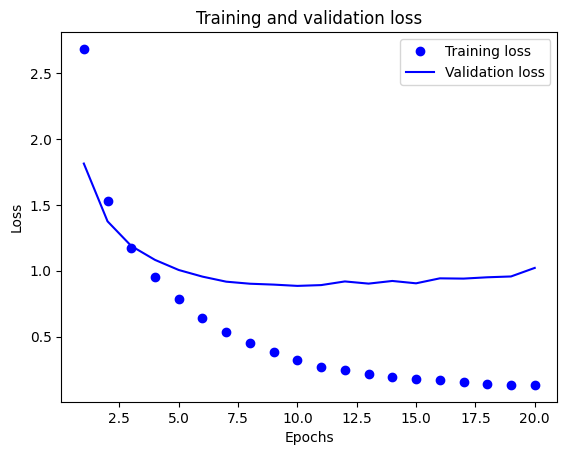

In [11]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

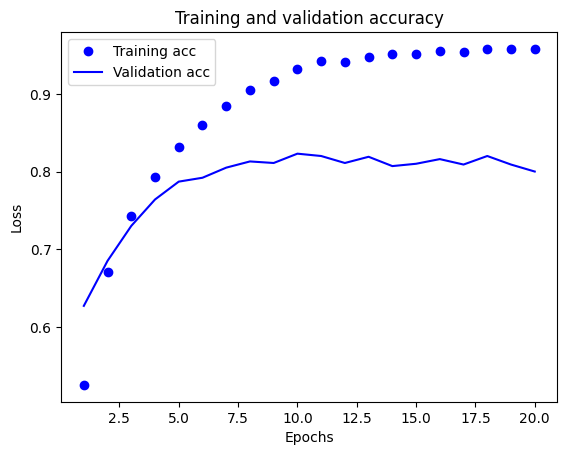

In [21]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retraining with epochs = 9

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 21ms/step - loss: 2.7642 - accuracy: 0.5045 - val_loss: 1.8409 - val_accuracy: 0.6270
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.5364 - accuracy: 0.6749 - val_loss: 1.3594 - val_accuracy: 0.6900
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.1576 - accuracy: 0.7467 - val_loss: 1.1770 - val_accuracy: 0.7280
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.9405 - accuracy: 0.7950 - val_loss: 1.0844 - val_accuracy: 0.7530
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.7809 - accuracy: 0.8262 - val_loss: 1.0162 - val_accuracy: 0.7760
Epoch 6/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6591 - accuracy: 0.8543 - val_loss: 0.9569 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5434 - accuracy: 0.8884 - val_loss: 0.9252 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [23]:
results

[0.9541317820549011, 0.7827248573303223]

In [24]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 950us/step


In [28]:
predictions.shape, np.sum(predictions[0]), np.argmax(predictions[0])

((2246, 46), 1.0000001, 3)

## Different way to encode
integer labels using sparse_categorical_crossentropy


In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])